<font size=7>Latency Histogram

# Code from Before

In [42]:
import pickle
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, plot_latency_dist_hist, plot_latency_angle_hist, \
                                 plot_cross_sttc_pairs, plot_vector_layout2, plot_vector_layout5, plot_vector_layout1, read_autocurated_data, plot_pair_analysis
from human_hip.spike_data import plot_raster
from human_hip.animate import animate_latencies

from scipy import stats
from ipywidgets import interact_manual, interact
import matplotlib.pyplot as plt
import numpy as np
from human_hip.spike_data import latencies

from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, cross_sttc, plot_pair_analysis, plot_cross_sttc_pairs
import pickle
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import numpy as np
import pickle


In [2]:
sd = read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


In [3]:
# load good_pairs.pkl
latency_ms = 30
with open("latencies/t_test_try30_try3/hc112823_acid_good_pairs.pkl", "rb") as filename:
    good_pairs = pickle.load(filename)
good_pairs2 = np.array(good_pairs)


In [4]:
print(len(good_pairs),"good pairs")
mean_latencies = []
for pair in good_pairs:
    mean_latency = np.mean( latencies( pair[0], pair[1], sd, ms_cutoff_high=latency_ms)  )
    mean_latencies.append(mean_latency)
print("all final pairs positive?:", np.all( np.array(mean_latencies)>0 ))

784 good pairs
all final pairs positive?: True


In [11]:
from ipywidgets import interact_manual, interact
from scipy import stats

def pairs_hisogram(good_pairs, sd, ms_cutoff_high=latency_ms ):
    @interact
    def plot_pair(pair_i = (0, len(good_pairs)-1) ):
        latencies_pair = latencies( good_pairs[pair_i][0], good_pairs[pair_i][1], sd, ms_cutoff_high=ms_cutoff_high )
        plt.xlim(-ms_cutoff_high, ms_cutoff_high)
        plt.hist(latencies_pair, bins=12)
        print("Pair: ", good_pairs[pair_i][0],good_pairs[pair_i][1] )
        print("Latency Mean:\t", np.mean(latencies_pair ) )
        print("Num Latencies:\t", len(latencies_pair) )

        t_stat, p_value = stats.ttest_1samp( latencies_pair, 0)
        one_sided_p_value = p_value / 2 if t_stat > 0 else 1 - p_value / 2
        print("T-Test 1-Side:\t", one_sided_p_value )  #print("T-Test: ", stats.ttest_1samp(latencies_pair, 0)[1] )
        
pairs_hisogram( good_pairs, sd, ms_cutoff_high=latency_ms)

interactive(children=(IntSlider(value=391, description='pair_i', max=783), Output()), _dom_classes=('widget-in…

# Find best pairs

In [29]:
best_pairs = []
for pair in good_pairs:
    latencies_pair = latencies( pair[0], pair[1], sd, ms_cutoff_high=latency_ms )
    if np.mean(latencies_pair) > 3:
        if len(latencies_pair) > 150:
            best_pairs.append(pair)


In [8]:
len(best_pairs)

31

In [13]:
pairs_hisogram( [[38,4], [75,4], [10,93], [187,21] ], sd, ms_cutoff_high=latency_ms)

interactive(children=(IntSlider(value=1, description='pair_i', max=3), Output()), _dom_classes=('widget-intera…

In [14]:
pairs_hisogram( best_pairs, sd, ms_cutoff_high=latency_ms)

interactive(children=(IntSlider(value=15, description='pair_i', max=30), Output()), _dom_classes=('widget-inte…

<font color="green"> Best Pairs: [ [38,4], [75,4], [10,93], [187,21] , [75,4] [58, 62], [147,90], [107,135], [107,62] ]

In [24]:
pairs_hisogram(  [ [38,4], [75,4], [10,93], [187,21] , [75,4], [58, 62], [147,90], [107,135], [107,62] ], sd, ms_cutoff_high=latency_ms)

interactive(children=(IntSlider(value=4, description='pair_i', max=8), Output()), _dom_classes=('widget-intera…

(-30.0, 30.0)

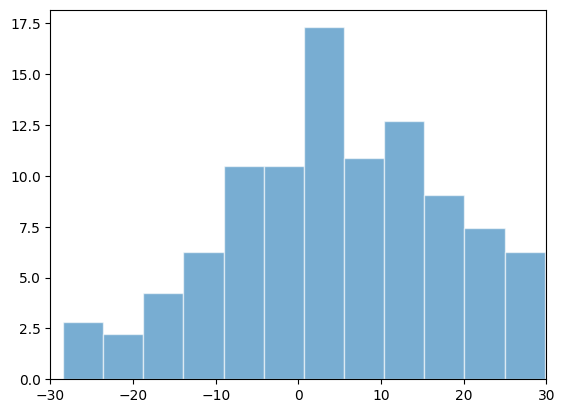

In [179]:
latencies_pair = latencies( 147, 90,sd, ms_cutoff_high=latency_ms  )



# Convert counts to percentages
counts, bins = np.histogram(latencies_pair, bins=12)

percentages = counts / counts.sum() * 100

# Plot the histogram with percentages
#plt.figure(figsize=(10, 6))
#plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, color='b', edgecolor='black')
plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, edgecolor='white' ) #, color='b', edgecolor='black')

plt.xlim(-30, 30)
# add red vertical line at 0, with opacity of 0.5
#plt.axvline(0, color='grey', alpha=1, linewidth=1.5)
#plt.hist(latencies_pair, bins=12, alpha=0.6)

In [163]:
np.mean(latencies_pair)

4.6582494969804555

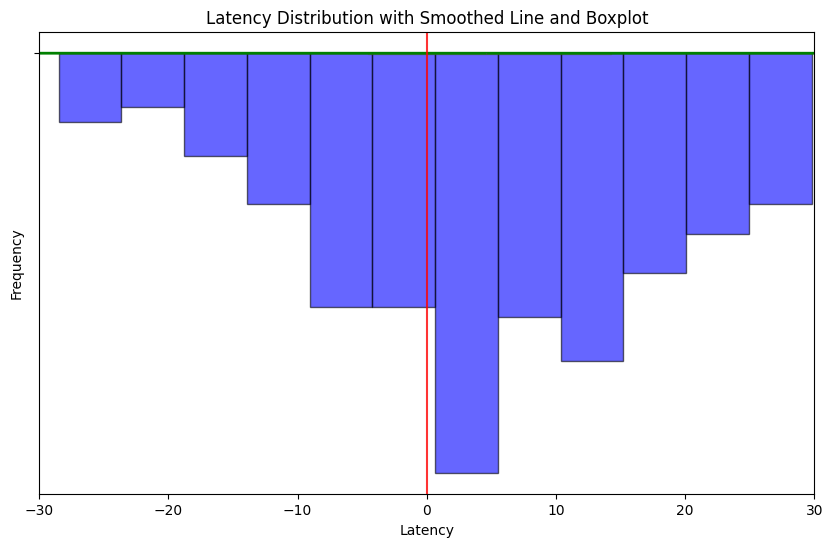

In [50]:
import seaborn as sns


# Assuming latencies_pair is a list or array of data points
latencies_pair = latencies(147, 90, sd, ms_cutoff_high=latency_ms)

plt.figure(figsize=(10, 6))

# Creating the histogram
plt.hist(latencies_pair, bins=12, alpha=0.6, color='b', edgecolor='black')

# Adding the boxplot
sns.boxplot(x=latencies_pair, color='orange', whis=1.5, width=0.2, boxprops=dict(alpha=0.5))

# Adding the smoothed line using seaborn's kdeplot
sns.kdeplot(latencies_pair, color='green', lw=2)

# Adding a red vertical line at 0 with opacity of 0.8
plt.axvline(0, color='red', alpha=0.8)

plt.xlim(-30, 30)
plt.xlabel('Latency')
plt.ylabel('Frequency')
plt.title('Latency Distribution with Smoothed Line and Boxplot')
plt.show()

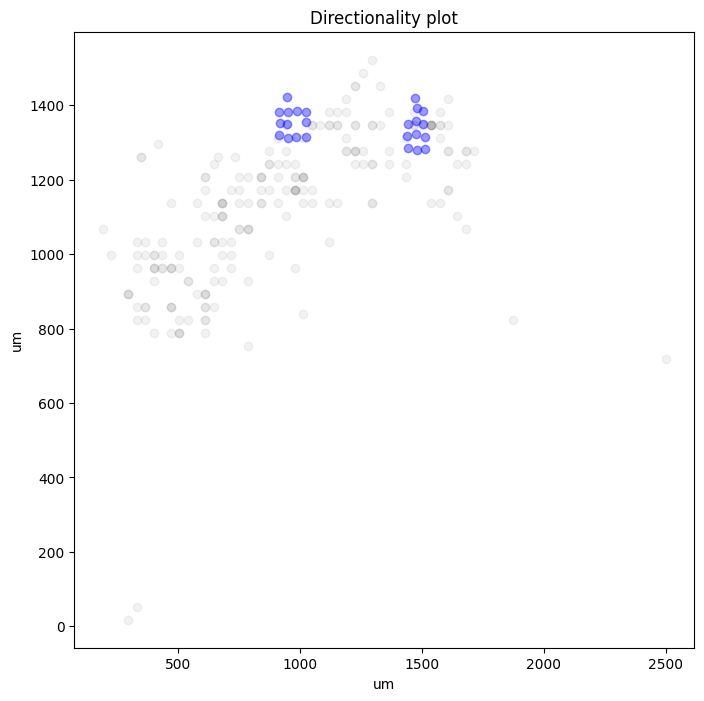

Number of Latencies 338
Mean Latency 1.917
Median Latency 3.4
STTC 0.5547833806662137
Diptest P-val 0.024
Latency Probability 0.83
.
Sender Neuron 147
Sender   Firing Rate 2.08
.
Receiver Neuron 90
Receiver Firing Rate 1.019


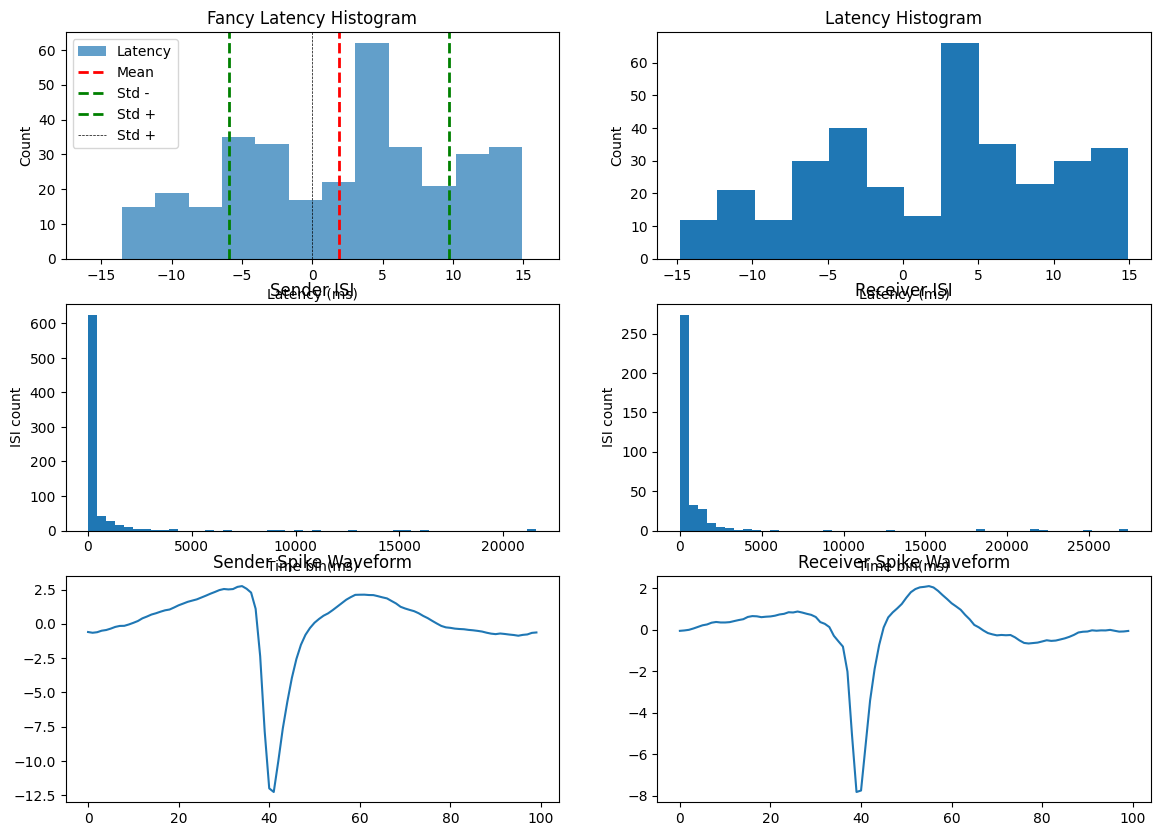

In [25]:
plot_pair_analysis(147,90, sd)

# Make spike Raster

(<Axes: xlabel='Time (s)', ylabel='Neural Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

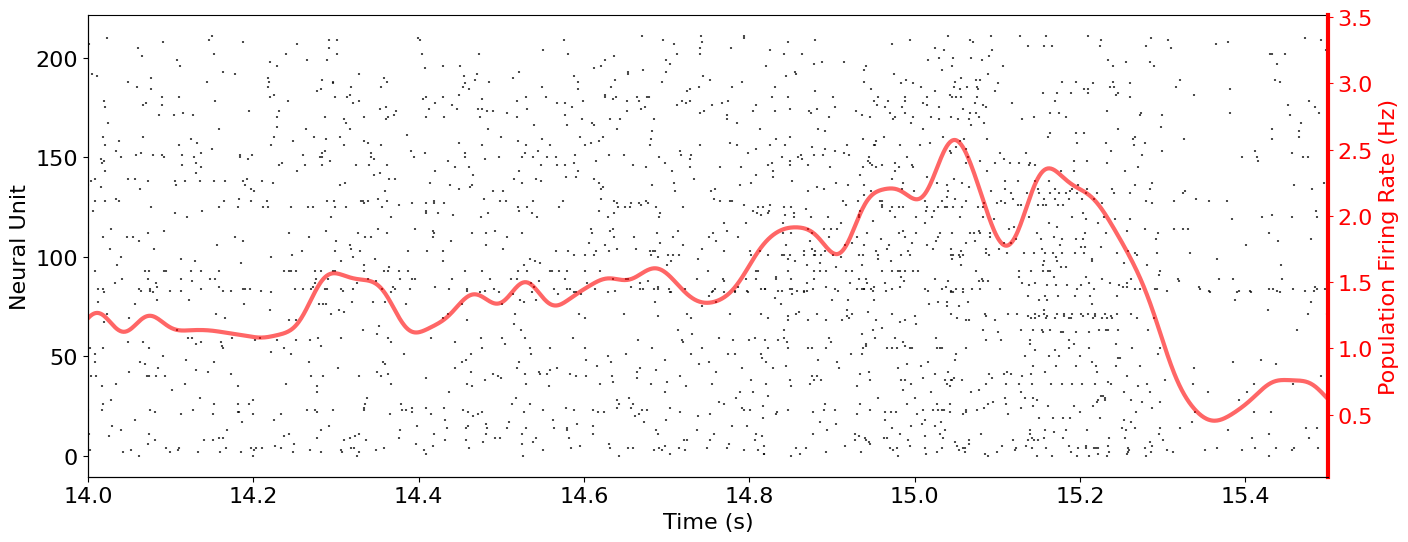

In [56]:
plot_raster(sd, xlim=(14,15.5))

[array([   461.75,    786.75,    799.85,    815.6 ,   2239.25,   2301.4 ,
          2312.05,   2320.7 ,   2397.35,   2424.  ,   3970.05,   4757.6 ,
          5075.6 ,   5568.7 ,   5721.95,   5926.6 ,   6033.65,   6805.55,
          7137.45,   7252.05,   7306.55,   7793.15,   8043.8 ,   8380.55,
          8943.55,   9184.8 ,   9591.1 ,   9808.  ,   9863.55,  10270.6 ,
         10442.25,  10705.9 ,  10993.  ,  11290.3 ,  11374.85,  11413.75,
         11461.2 ,  11652.  ,  11765.8 ,  12053.5 ,  12265.7 ,  12466.  ,
         12779.05,  12994.35,  13064.55,  13252.7 ,  13377.9 ,  13515.8 ,
         14017.6 ,  14131.3 ,  14235.2 ,  14587.7 ,  14698.4 ,  14827.45,
         14946.4 ,  14976.3 ,  15062.5 ,  15096.85,  15115.75,  15126.35,
         15140.15,  15233.1 ,  16085.25,  16169.7 ,  16218.6 ,  16342.85,
         16359.65,  16375.  ,  16837.7 ,  17505.15,  17719.55,  17729.45,
         17739.9 ,  17747.2 ,  17782.85,  18205.55,  18737.1 ,  18859.8 ,
         20675.7 ,  20687.3 ,  20695.4

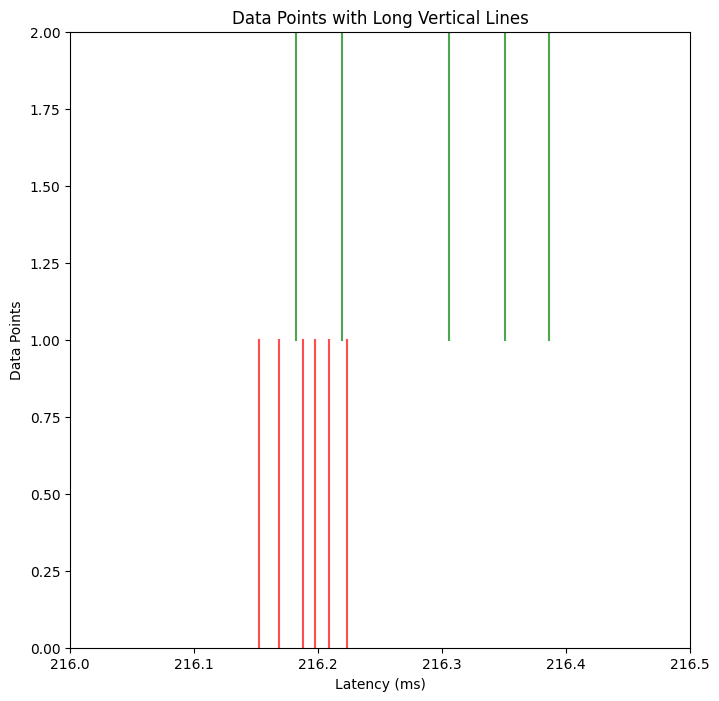

In [83]:
plt.figure(figsize=(8, 8))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x/1000, x/1000], [0, 1], color='red', alpha=0.7)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x/1000, x/1000], [1, 2], color='green', alpha=0.7)

plt.xlim(216, 216.5)
plt.ylim(0, 2)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

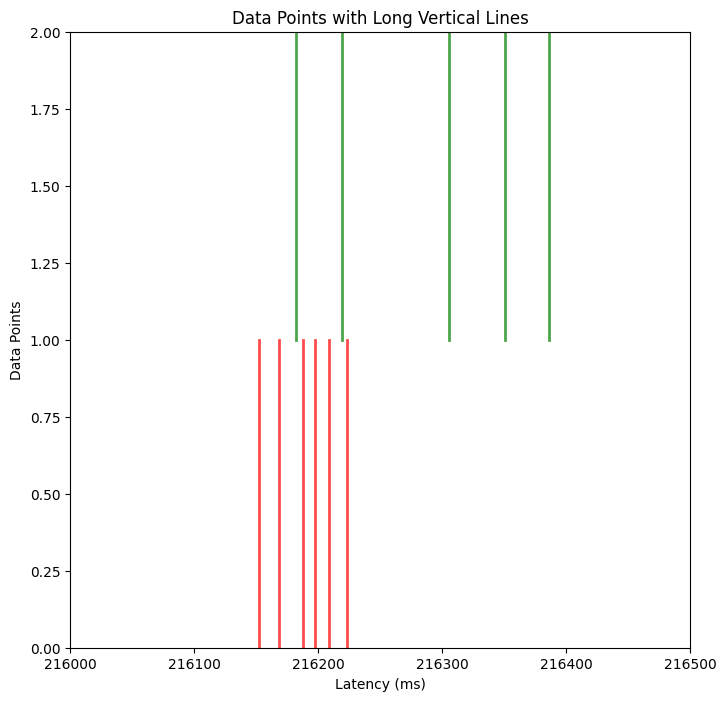

In [88]:
plt.figure(figsize=(8, 8))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x, x], [0, 1], color='red', alpha=0.7, linewidth=2)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x, x], [1, 2], color='green', alpha=0.7, linewidth=2)

plt.xlim(216*1000, 216.5*1000)
plt.ylim(0, 2)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

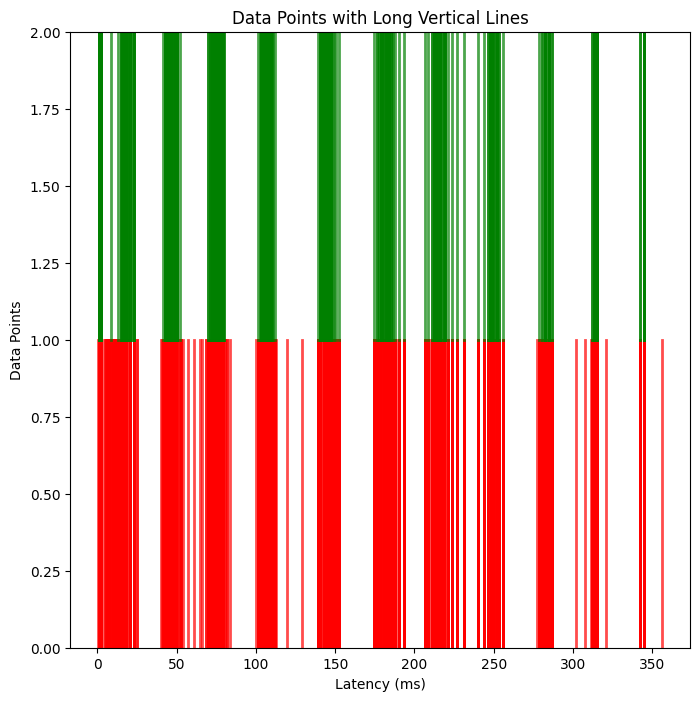

In [85]:
plt.figure(figsize=(8, 8))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x/1000, x/1000], [0, 1], color='red', alpha=0.7, linewidth=2)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x/1000, x/1000], [1, 2], color='green', alpha=0.7, linewidth=2)

#plt.xlim(216, 216.5)
plt.ylim(0, 2)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

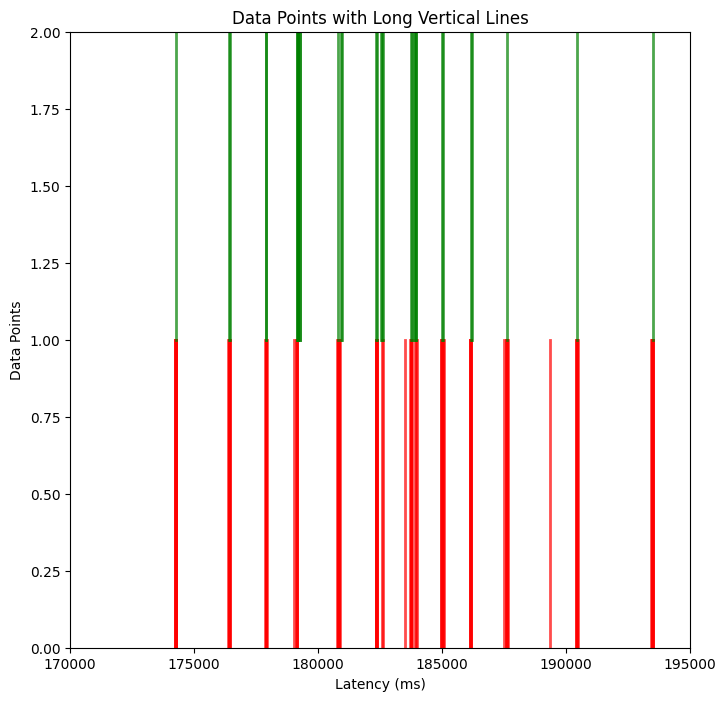

In [92]:
plt.figure(figsize=(8, 8))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x, x], [0, 1], color='red', alpha=0.7, linewidth=2)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x, x], [1, 2], color='green', alpha=0.7, linewidth=2)

plt.xlim(170000, 195000)
plt.ylim(0, 2)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

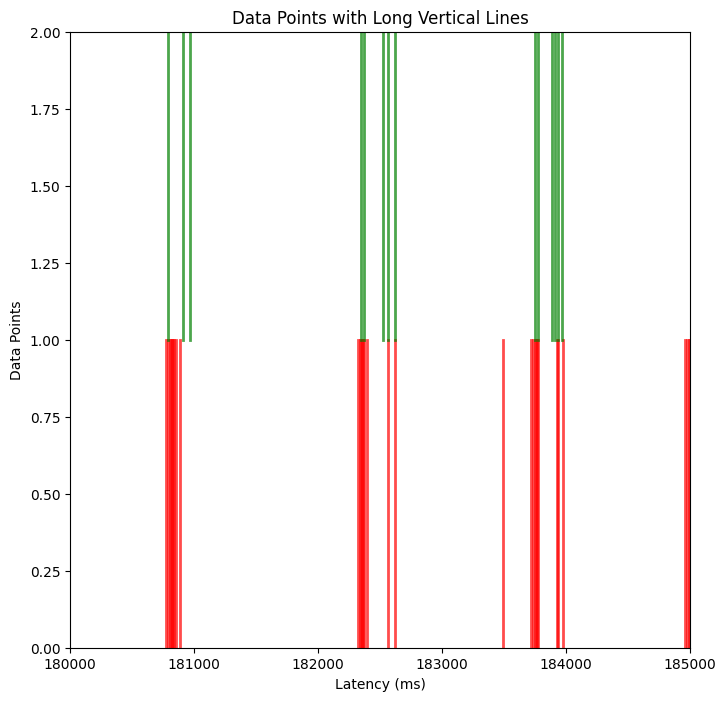

In [93]:
plt.figure(figsize=(8, 8))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x, x], [0, 1], color='red', alpha=0.7, linewidth=2)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x, x], [1, 2], color='green', alpha=0.7, linewidth=2)

plt.xlim(180000, 185000)
plt.ylim(0, 2)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

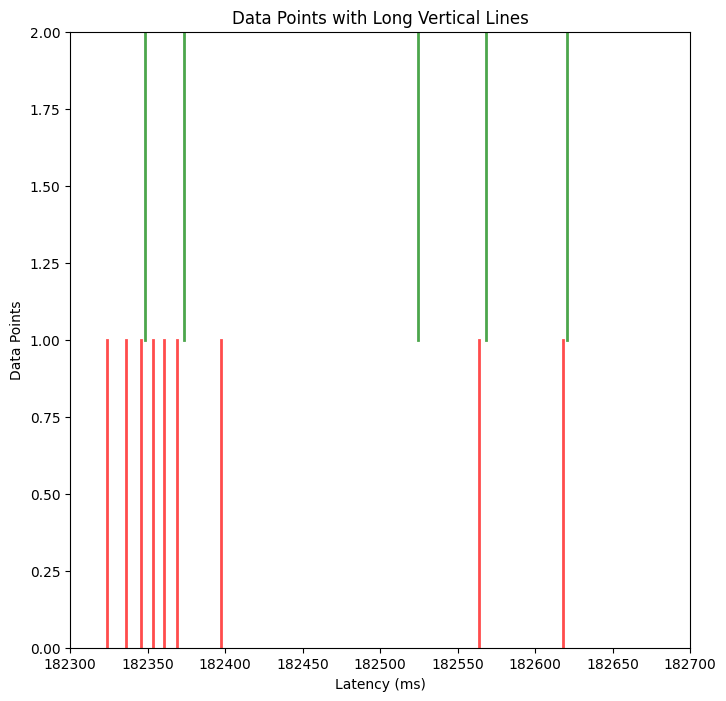

In [96]:
plt.figure(figsize=(8, 8))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x, x], [0, 1], color='red', alpha=0.7, linewidth=2)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x, x], [1, 2], color='green', alpha=0.7, linewidth=2)

plt.xlim(182300, 182700)
plt.ylim(0, 2)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

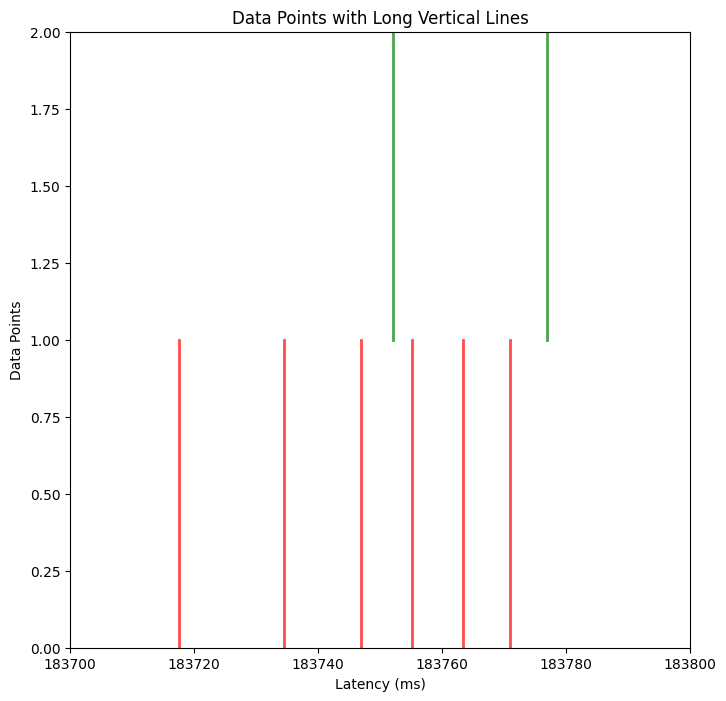

In [98]:
plt.figure(figsize=(8, 8))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x, x], [0, 1], color='red', alpha=0.7, linewidth=2)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x, x], [1, 2], color='green', alpha=0.7, linewidth=2)

plt.xlim(183700, 183800)
plt.ylim(0, 2)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

# <font color="brown"> Try 2

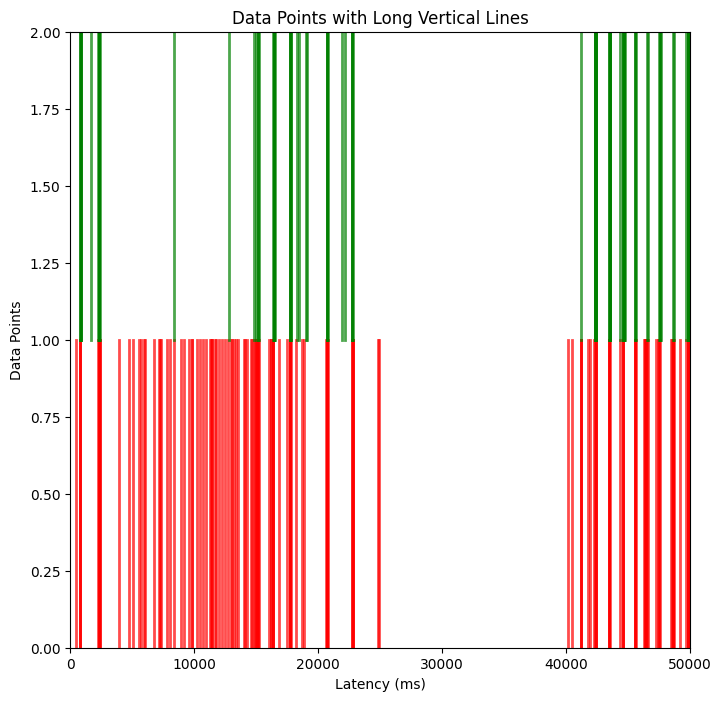

In [101]:
plt.figure(figsize=(8, 8))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x, x], [0, 1], color='red', alpha=0.7, linewidth=2)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x, x], [1, 2], color='green', alpha=0.7, linewidth=2)

plt.xlim(0, 50000)
plt.ylim(0, 2)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

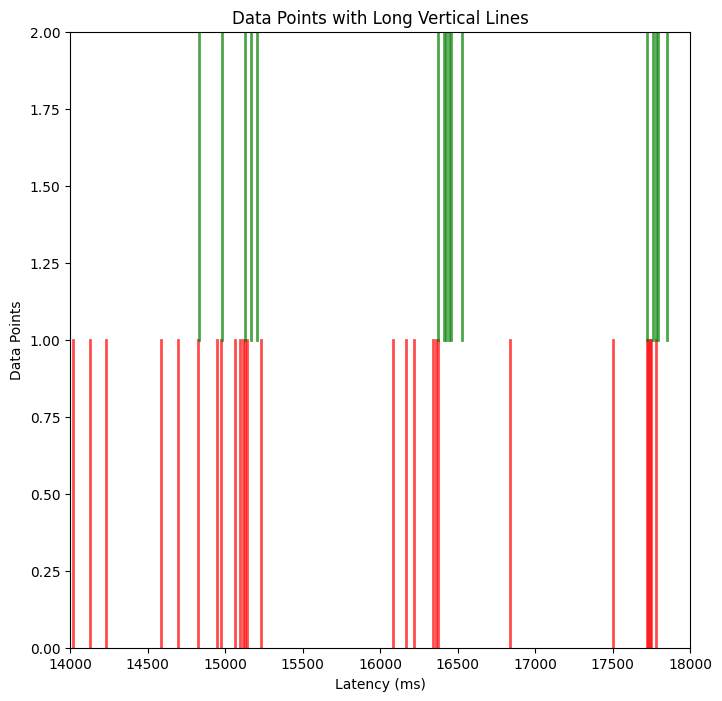

In [103]:
plt.figure(figsize=(8, 8))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x, x], [0, 1], color='red', alpha=0.7, linewidth=2)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x, x], [1, 2], color='green', alpha=0.7, linewidth=2)

plt.xlim(14000, 18000)
plt.ylim(0, 2)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

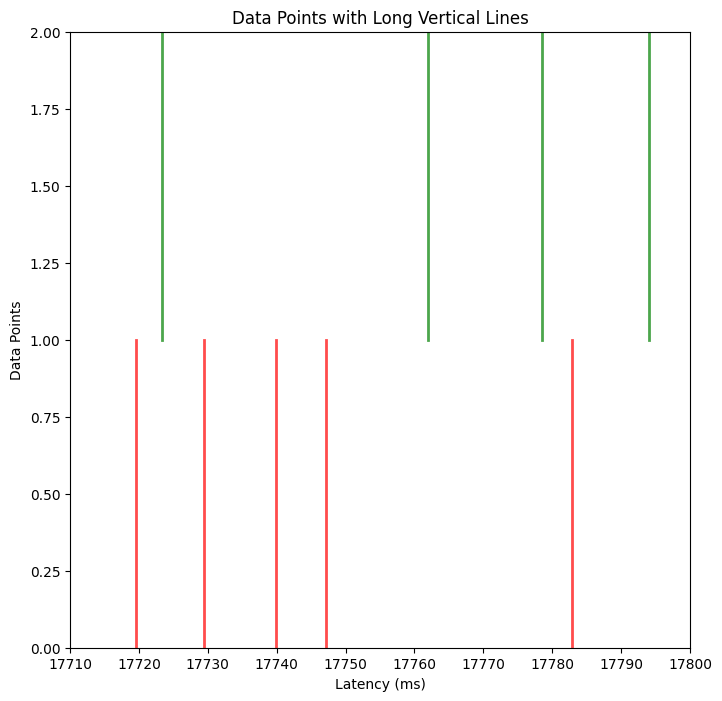

In [106]:
plt.figure(figsize=(8, 8))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x, x], [0, 1], color='red', alpha=0.7, linewidth=2)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x, x], [1, 2], color='green', alpha=0.7, linewidth=2)

plt.xlim(17710, 17800)
plt.ylim(0, 2)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

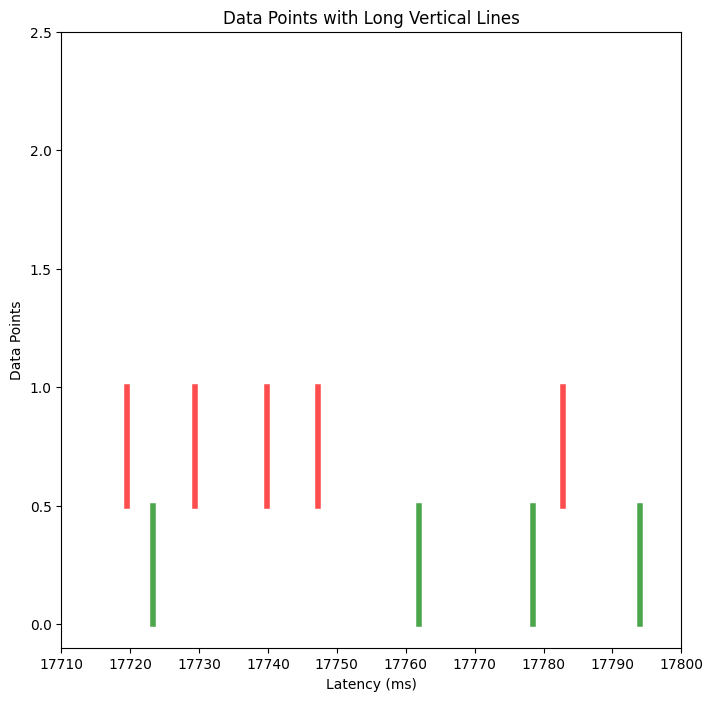

In [112]:
plt.figure(figsize=(8, 8))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x, x], [.5, 1], color='red', alpha=0.7, linewidth=4)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x, x], [0, .5], color='green', alpha=0.7, linewidth=4)

plt.xlim(17710, 17800)
plt.ylim(-.1, 2.5)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

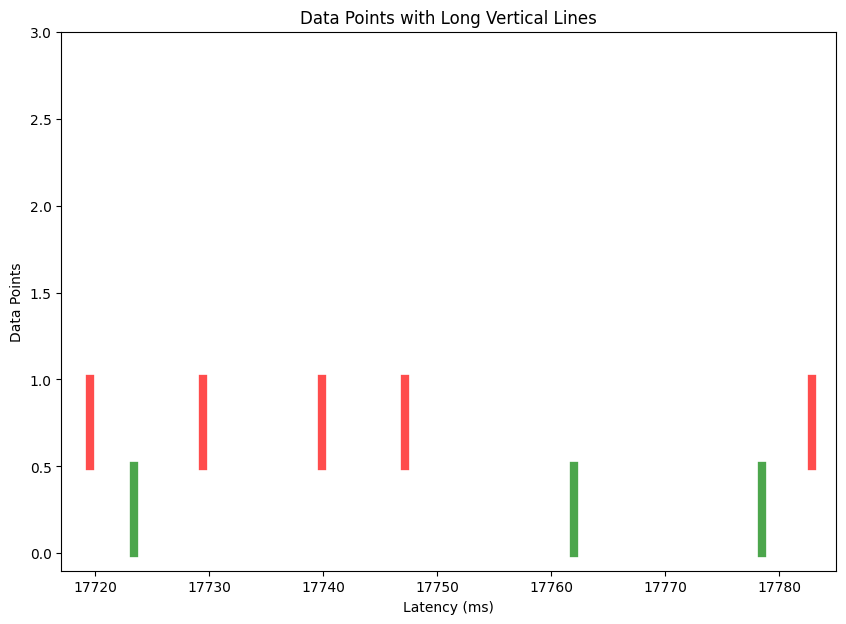

In [122]:
plt.figure(figsize=(10, 7))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x, x], [.5, 1], color='red', alpha=0.7, linewidth=6)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x, x], [0, .5], color='green', alpha=0.7, linewidth=6)

plt.xlim(17717, 17785)
plt.ylim(-.1, 3)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

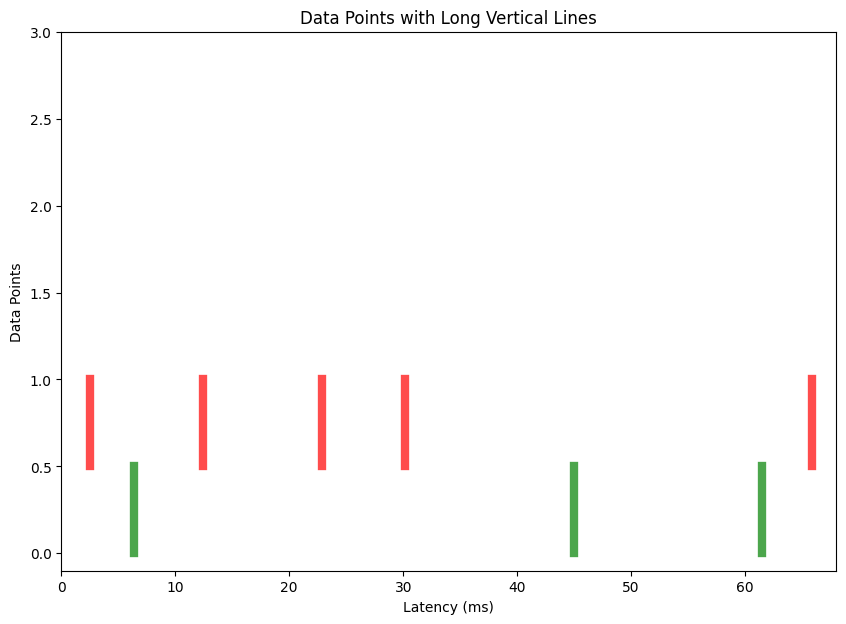

In [124]:
plt.figure(figsize=(10, 7))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x-17717, x-17717], [.5, 1], color='red', alpha=0.7, linewidth=6)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x-17717, x-17717], [0, .5], color='green', alpha=0.7, linewidth=6)

plt.xlim(0, 17785-17717)
plt.ylim(-.1, 3)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

# <font color="brown"> Try 3

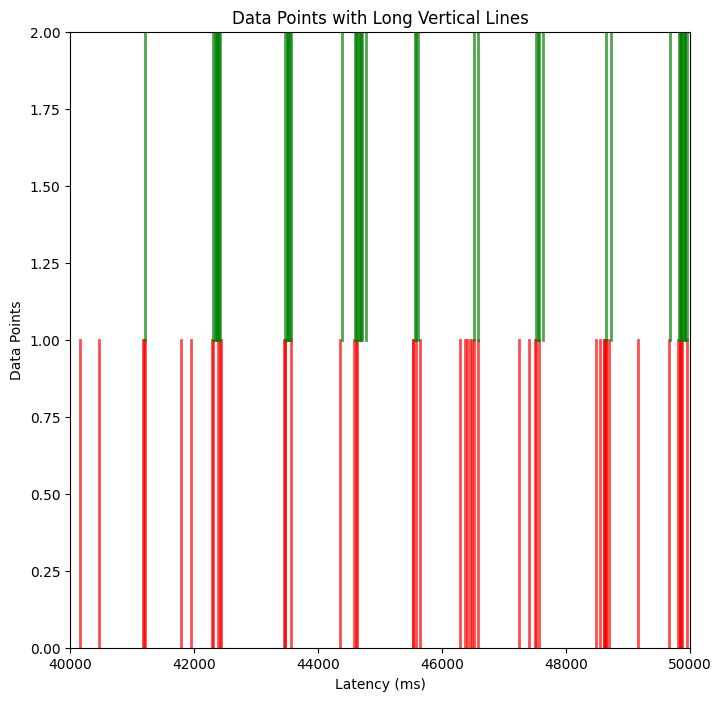

In [127]:
plt.figure(figsize=(8, 8))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x, x], [0, 1], color='red', alpha=0.7, linewidth=2)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x, x], [1, 2], color='green', alpha=0.7, linewidth=2)

plt.xlim(40000, 50000)
plt.ylim(0, 2)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

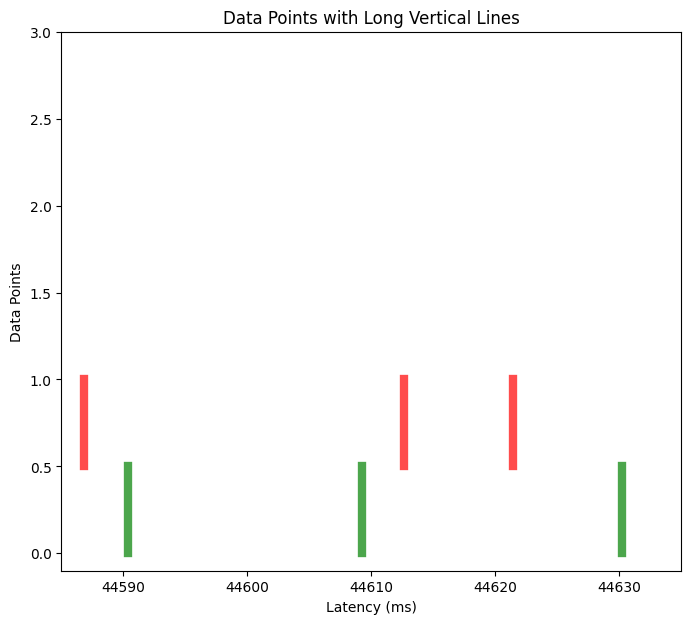

In [139]:
plt.figure(figsize=(8, 7))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x, x], [.5, 1], color='red', alpha=0.7, linewidth=6)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x, x], [0, .5], color='green', alpha=0.7, linewidth=6)

plt.xlim(44585, 44635)
plt.ylim(-.1, 3)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

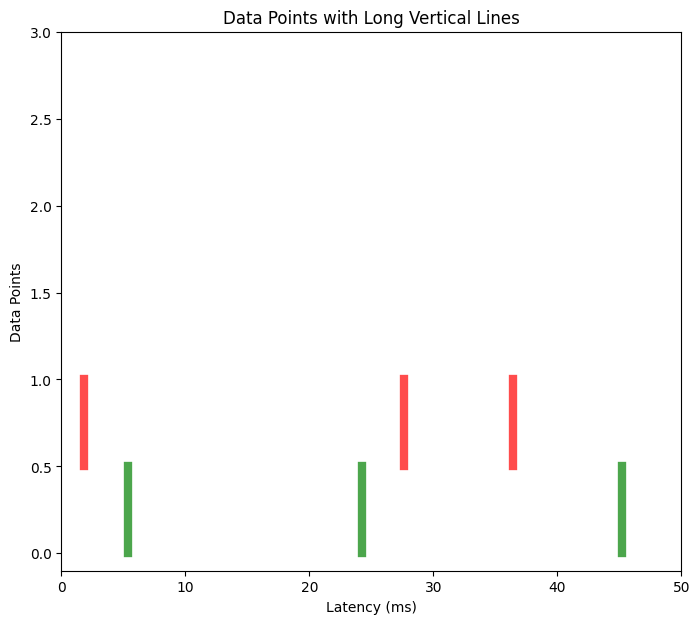

In [158]:
plt.figure(figsize=(8, 7))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x-44585, x-44585], [.5, 1], color='red', alpha=0.7, linewidth=6)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x-44585, x-44585], [0, .5], color='green', alpha=0.7, linewidth=6)

#plt.vlines([1.85,5.35,24.25,27.6,36.45,45.2], 0, 2, color='red', alpha=0.7)

plt.xlim(44585-44585, 44635-44585)
plt.ylim(-.1, 3)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()





In [157]:
print("Latencies")
print(5.35-1.85)
print(24.25-27.6)
print(45.2-36.45)

Latencies
3.4999999999999996
-3.3500000000000014
8.75


In [152]:
for x in sd.train[147]:
    if x-44585<50 and x-44585>0:
        print(x-44585)
print("_____________")
for x in sd.train[90]:
    if x-44585<50 and x-44585>0:
        print(x-44585)

1.8499999999985448
27.599999999998545
36.450000000004366
_____________
5.349999999998545
24.25
45.200000000004366
